# 1. Background of the Study: Multi-Label Product Classifier
This notebook documents the development of a Multi-Label Classification Model for the Lumora e-commerce platform.

---

# Title of the Study
## **Lumora: Multi-Label NLP Classifier for Automatic Tagging of Filipino Contemporary Arts and Crafts**

---

# Source of Data
The dataset, named LumoraProductDataset.csv, was collected from various online sources showcasing Filipino handmade goods and artisanal products.

- Source: Aggregated data from various public e-commerce listings focusing on Filipino handcrafted goods.
- Original Format: CSV/Excel tabular data.

---

# Brief Description of Dataset
This dataset consists of unique product listings designed to train an automated tagging model for the Lumora C2C platform. Each row represents a single handcrafted or creative item.

- Data Dimensions: The initial dataset contained 644 rows and 12 columns. 

- Meaning of Each Variable (Selected for Modeling):

1. `Product name` and `Product description`: Primary text fields used to infer the tags.

2. `Color`, `Size`, `Material`: Secondary text fields concatenated to enrich the product context.

3. `Tags`: The comma-separated field of labels manually assigned to the product (e.g., wedding, tote, floral embroidery, Filipino, sustainable).

---

# Model Variables
| Variable | Description | Role in Model |
|--------|-------------|-------------|
| **Selected Features (Independent Variables)** | The concatenated and pre-processed text derived from the Product name, Product description, Color, Size, and Material columns. | **X (Input)**: This single text input is converted into a numerical vector (e.g., using TF-IDF). |
| **Target / Label Column (Dependent Variable)** | The cleaned Tags column. This column will be converted into a binary matrix where each unique tag (e.g., cute, crochet, minimalist) is a separate binary feature (0 or 1). | **Y (Output)**: The labels the model is trained to predict simultaneously for a given product. |

---

# Objective
The objective is to develop a highly accurate Multi-Label NLP Classifier that can automatically assign a set of relevant categories and stylistic attributes to new product listings. This model will reduce the manual effort for sellers and ensure new products are appropriately tagged (e.g., keychain, crochet, kawaii, minimalist), thereby improving product discoverability on the Lumora platform for both general and niche search queries.

---

# 2. Data Collection / Loading
The data used for training the Multi-Label Classifier model is sourced from the `LumoraProductDataset.csv` file, which aggregates product listings from various Filipino arts and crafts sellers.

In [17]:
# Importing necessary libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
# initializing dataframe
df = pd.read_csv('Lumora_Product_Dataset.csv')
df.head()

,Product name,Product description,Price,Category,Subcategory,Color,Size,Material,Tags,Product link,Image link,Brand / seller name
0,Flowers Convertible Puso Wedding Tote,A versatile hobo-style tote embroidered with f...,PHP 11172.22,Bags,Wedding Tote,White,Unspecified,"Upcycled fabric, leather","wedding, tote, floral embroidery, Filipino, su...",Unspecified,Unspecified,SintaWeddings
1,Manila Jeepney 3-in-1 Handbag,A colorful handbag inspired by the iconic jeep...,PHP 12406.79,Bags,Handbag,Multicolor,Unspecified,"Upcycled fabric, leather","jeepney, handbag, Filipino, sustainable",Unspecified,Unspecified,SintaWeddings
2,Vinia Hardin Fanny Pack,A belt-style fanny pack handwoven with upcycle...,PHP 4875.93,Bags,Fanny Pack,Black,Unspecified,"Upcycled fabric, leather","fanny pack, Filipino, sustainable",Unspecified,Unspecified,SintaWeddings
3,Sling Bag (Pinilian/Inabel Weave),A crossbody sling bag showcasing traditional P...,PHP 5554.94,Bags,Sling Bag,Blue,Unspecified,"Upcycled fabric, Pinilian/Inabel weave","sling bag, Filipino, handwoven, sustainable",Unspecified,Unspecified,SintaWeddings
4,Alon Woven Waves Shoulder Bag,"A shoulder bag with wave-pattern weaving, comb...",PHP 12653.70,Bags,Shoulder Bag,Blue,Unspecified,"Upcycled fabric, leather","shoulder bag, woven waves, Filipino, sustainable",Unspecified,Unspecified,SintaWeddings


---
# 3. Data Information and Summary Statistics
This section presents the initial inspection of the loaded dataset to understand its structure, completeness, and the distribution of the key variables.

## Initial Data Inspection
The initial inspection confirms the overall data integrity, type, and dimensions.

In [18]:
# Show column types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Product name         644 non-null    object
 1   Product description  644 non-null    object
 2   Price                644 non-null    object
 3   Category             644 non-null    object
 4   Subcategory          644 non-null    object
 5   Color                644 non-null    object
 6   Size                 644 non-null    object
 7   Material             644 non-null    object
 8   Tags                 644 non-null    object
 9   Product link         644 non-null    object
 10  Image link           644 non-null    object
 11  Brand / seller name  639 non-null    object
dtypes: object(12)
memory usage: 60.5+ KB


In [19]:
# Show dataset dimensions
df.shape

(644, 12)

In [20]:
# Show count of missing values per column
df.isnull().sum()

Product name           0
Product description    0
Price                  0
Category               0
Subcategory            0
Color                  0
Size                   0
Material               0
Tags                   0
Product link           0
Image link             0
Brand / seller name    5
dtype: int64

## Summary of Initial Findings
- **Data Dimensions**: The initial raw dataset contains 644 entries (rows) and 12 columns.

- **Missing Values**: Only the Brand / seller name column has 5 missing (non-null) values. Since this column is not directly used for the NLP model's input text content or the target tags, these missing values will be handled by dropping the column during the cleaning phase.

- **Data Types**: All columns are of the generic object (string) type, which is expected since the majority of the columns (Product name, Product description, Tags, Material, etc.) are text-based inputs for the NLP model.

# Key Metric Analysis (Categorical and Target)
Since this is a classification problem, it is crucial to analyze the unique values and frequency distribution of the target column (Tags) and other categorical columns that influence it (Category).

In [21]:
# Show descriptive statistics for object columns
df.describe(include='object')

# Show value counts for the primary Category column
category_df = df['Category'].value_counts().to_frame()
print("\nCategory Distribution:\n")
print(category_df.head(46))


Category Distribution:

                            count
Category                         
Jewelry                       151
Vintage                        59
Ornaments                      46
POD                            28
Stickers                       25
Clothing                       23
Philippine Handicrafts         22
Digital Downloads              22
Stickers/Decals                19
Philippine Souvenir            18
Pasko & Parols                 17
Keychains/Charms               17
Wedding Ceremony               16
Bags                           16
Accessories                    16
Bundle Deals                   16
Filipiniana Attire             13
Apparel                        13
Prints                         12
Pinoy Keychains & Charms       10
Vintage Movies                  9
Stationery & Stickers           9
Keychains                       8
Native                          7
Capiz Decor                     6
Printables                      5
Mugs                   

## Summary of Key Metrics
**Categories**: There are 46 unique categories in the dataset. The most frequent category is "Jewelry" (151 counts), followed by "Vintage" (59 counts). This unequal distribution is common and must be considered during modeling.

**Product Names/Descriptions**: There are 601 unique product names and 560 unique product descriptions out of 644 total entries, suggesting high diversity among the listed products.

**Tags (Target Variable)**: The Tags column has 565 unique values out of 644 total rows. This high cardinality confirms that the problem is highly suited for Multi-Label Classification, as most products are uniquely tagged with a combination of attributes.

---
# 4. Data Cleaning
This section details the critical data cleaning operations performed on the raw text dataset to ensure consistency, handle missing values, and prepare the data for subsequent feature engineering.

## A. Handle Missing Values
Missing values (NaN or empty strings) in text columns can disrupt the NLP pipeline. Based on the initial data inspection, only the Brand / seller name column had 5 missing values. Since this column is text-based and its content might be useful for enrichment, we fill the missing values with an empty string ('') rather than dropping the entire row.

In [22]:
# Handle missing values by filling NaN with an empty string (for text compatibility)
df = df.fillna('')

# Verify that all missing values have been handled
print("Missing values after filling:")
print(df.isnull().sum())

Missing values after filling:
Product name           0
Product description    0
Price                  0
Category               0
Subcategory            0
Color                  0
Size                   0
Material               0
Tags                   0
Product link           0
Image link             0
Brand / seller name    0
dtype: int64


## B. Handle Duplicate Rows
Duplicate product listings can skew frequency analysis and unnecessarily increase model training time. We remove any identical rows that may have resulted from data scraping or entry errors.

In [23]:
# Drop any completely duplicate rows and update the DataFrame in place
initial_rows = df.shape[0]
df = df.drop_duplicates()
rows_after_cleaning = df.shape[0]

# Report the change in dimensions
print(f"\nInitial rows: {initial_rows}")
print(f"Rows after dropping duplicates: {rows_after_cleaning}")
print(f"Total duplicates removed: {initial_rows - rows_after_cleaning}")
print(f"New DataFrame shape: {df.shape}")


Initial rows: 644
Rows after dropping duplicates: 618
Total duplicates removed: 26
New DataFrame shape: (618, 12)


## C. Standardize Inconsistent Data (Text Normalization)
Inconsistent text data, such as differing capitalization, irregular spacing, and varied units, confuses the model by treating the same concept (e.g., 'RING' vs. 'ring') as two different entities. We apply normalization steps to the text columns that will serve as model features.

### 1. Standardize Whitespace and Casing
We remove leading/trailing whitespace and reduce multiple spaces between words to a single space. We then convert the feature columns to a standardized casing (e.g., Title Case for categorical fields, Lowercase for the main text fields like Product Description) to group similar terms.

In [24]:
# List of text columns for general cleaning
text_columns = ['Product name', 'Product description', 'Category', 'Subcategory', 'Size', 'Material', 'Tags']
df_clean = df.copy()

# 1. Strip whitespace and reduce multi-spaces
for col in text_columns:
    df_clean[col] = df_clean[col].str.strip()
    df_clean[col] = df_clean[col].str.replace(r'\s+', ' ', regex=True)

# 2. Standardize Casing (Note: Categorical data is often left Title/Upper until feature encoding)
df_clean['Size'] = df_clean['Size'].str.upper()
df_clean['Material'] = df_clean['Material'].str.title()
# The main text fields for the model will be lowercased later in the pre-processing stage

print("\n✓ Whitespace and Casing Standardization applied to categorical features.")
df.head(2)


✓ Whitespace and Casing Standardization applied to categorical features.


,Product name,Product description,Price,Category,Subcategory,Color,Size,Material,Tags,Product link,Image link,Brand / seller name
0,Flowers Convertible Puso Wedding Tote,A versatile hobo-style tote embroidered with f...,PHP 11172.22,Bags,Wedding Tote,White,Unspecified,"Upcycled fabric, leather","wedding, tote, floral embroidery, Filipino, su...",Unspecified,Unspecified,SintaWeddings
1,Manila Jeepney 3-in-1 Handbag,A colorful handbag inspired by the iconic jeep...,PHP 12406.79,Bags,Handbag,Multicolor,Unspecified,"Upcycled fabric, leather","jeepney, handbag, Filipino, sustainable",Unspecified,Unspecified,SintaWeddings


### 2. Standardize Inconsistent Formatting
We use regular expressions to fix common inconsistencies in the unstructured data, such as measurement units and common compound words.

In [25]:
# 3. Standardize SIZE field inconsistencies (e.g., 'inches' to 'in')
def standardize_size(size_str):
    if not isinstance(size_str, str) or size_str == '':
        return ''
    # Standardize "inches" variations
    size_str = re.sub(r'\binches\b', 'in', size_str, flags=re.IGNORECASE)
    size_str = re.sub(r'\binch\b', 'in', size_str, flags=re.IGNORECASE)
    # Standardize 'x' separator
    size_str = re.sub(r'\s*x\s*', ' x ', size_str, flags=re.IGNORECASE)
    # Standardize common abbreviations
    size_str = re.sub(r'\bapprox\.?\b', 'Approx.', size_str, flags=re.IGNORECASE)
    return size_str.strip()

df_clean['Size'] = df_clean['Size'].apply(standardize_size)

# 4. Standardize MATERIAL field inconsistencies
def standardize_materials(material_str):
    if not isinstance(material_str, str) or material_str == '':
        return ''
    # Standardize common material combinations
    material_str = re.sub(r'\bvinyl sticker with matte finish\b', 'Vinyl Sticker (Matte Finish)', material_str, flags=re.IGNORECASE)
    material_str = re.sub(r'\bmetal keychain ring\b', 'Metal Findings', material_str, flags=re.IGNORECASE)
    return material_str.title()

df_clean['Material'] = df_clean['Material'].apply(standardize_materials)

print("✓ Size and Material formats standardized.")

✓ Size and Material formats standardized.


### 3. Clean Special Characters
We clean up stray characters, quotes, and encoding issues that can split words or introduce noise into the tokenization process.

In [26]:
# 5. Fix special characters and encoding issues
def clean_special_chars(text):
    if not isinstance(text, str) or text == '':
        return ''
    # Normalize dashes and remove invisible characters
    text = text.replace('—', '-').replace('–', '-')
    text = re.sub(r'[\u200b-\u200f\u202a-\u202e\ufeff]', '', text)
    # Remove problematic quotes/symbols (already handled in cleaning step 1)
    return text

for col in text_columns:
    df_clean[col] = df_clean[col].apply(clean_special_chars)

print("✓ Special characters cleaned.")

✓ Special characters cleaned.


## Summary of Data Cleaning Operations
The data cleaning phase achieved the following:

- **Completeness**: All 5 missing values in the Brand / seller name column were successfully filled with empty strings.

- **Validity**: 26 duplicate rows were removed, resulting in a cleaner dataset of 618 unique entries for modeling.

- **Consistency**: All text-based feature columns (Product name, Description, Size, Material, etc.) were normalized for casing, whitespace, and key format variations, ensuring the NLP model trains on unified concepts (e.g., '2 IN' instead of '2 inches', 'Vinyl Sticker (Matte Finish)' instead of 'vinyl sticker with matte finish').

---
# 5. Data Engineering / Pre-processing: Step 1 (Feature Concatenation)
The goal of the Multi-Label Classifier is to predict the tags from the product description and related attributes. To provide the model with the richest context, combinine the most descriptive text fields: `Product name`, `Product description`, `Color`, `Size`, and `Material`.

## A. Dropping Unnecessary Columns
The columns Price, Product link, Image link, and Brand / seller name are unnecessary for the Multi-Label Classifier because they don't help determine the product's descriptive tags, or they introduce noise. 
1. Irrelevance: The Price is a numerical variable and is generally not a direct semantic feature that dictates the style or material tags of an item.

2. Noise: Product link and Image link mostly contain non-semantic URLs that, even after cleaning, would add unnecessary noise to the model's vocabulary.

3. Low Value: The Brand / seller name might add a little value, but it's not core to describing the product itself and can introduce bias or overfitting based on a specific seller. Since the column also had missing values that were just filled with empty strings, it's best to exclude it.

4. Efficiency: Dropping these columns makes the DataFrame smaller and faster to process during the subsequent NLP steps (Tokenization, Vectorization, etc.).

In [27]:
# List of columns to drop as they are not needed for tag prediction
columns_to_drop = [
    'Price', 
    'Product link', 
    'Image link', 
    'Brand / seller name'
]

# Drop the columns from the cleaned DataFrame
df_clean = df_clean.drop(columns=columns_to_drop, axis=1)

print("✓ Unnecessary columns successfully dropped.")
print(f"New DataFrame shape: {df_clean.shape}")
print(f"Remaining columns: {df_clean.columns.tolist()}")

✓ Unnecessary columns successfully dropped.
New DataFrame shape: (618, 8)
Remaining columns: ['Product name', 'Product description', 'Category', 'Subcategory', 'Color', 'Size', 'Material', 'Tags']


## B. Concatination
Combining these features into a single string ensures that the model learns the relationship between attributes (e.g., the word "Blue" in the Color column) and the resulting tags (e.g., a tag like "pastel" or "ocean-themed" which might be implied by the description).


In [28]:
# --- RUN THIS CODE AFTER DROPPING COLUMNS ---

# Concatenate relevant text columns into one feature column (TEXT_CONTENT)
# We fill any remaining blanks with an empty string and ensure they are strings before concatenation
df_clean['TEXT_CONTENT'] = (
    df_clean['Product name'].fillna('').astype(str) + ' ' +
    df_clean['Product description'].fillna('').astype(str) + ' ' +
    df_clean['Color'].fillna('').astype(str) + ' ' +
    df_clean['Size'].fillna('').astype(str) + ' ' +
    df_clean['Material'].fillna('').astype(str)
)

print("\n✓ TEXT_CONTENT column created successfully.")

# Display the remaining columns to verify
print("\nVerification of Final Features and Target:")
print(df_clean[['Product name', 'Product description', 'Tags', 'TEXT_CONTENT']].head(2).to_string())


✓ TEXT_CONTENT column created successfully.

Verification of Final Features and Target:
                            Product name                                                                                                              Product description                                                     Tags                                                                                                                                                                                                      TEXT_CONTENT
0  Flowers Convertible Puso Wedding Tote  A versatile hobo-style tote embroidered with floral motifs, designed for weddings and crafted from upcycled fabric and leather.  wedding, tote, floral embroidery, Filipino, sustainable  Flowers Convertible Puso Wedding Tote A versatile hobo-style tote embroidered with floral motifs, designed for weddings and crafted from upcycled fabric and leather. White UNSPECIFIED Upcycled Fabric, Leather
1          Manila Jeepney 3-in-1 Hand

## C. Tokenization
Tokenization is the process of splitting a continuous sequence of text into smaller, meaningful units called tokens. These tokens are typically individual words, but they can also be phrases, numbers, or punctuation.

In [30]:
import pandas as pd
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

# Assuming df_clean is your current DataFrame with the 'TEXT_CONTENT' column

# 1. Ensure NLTK resources are available (needed if the kernel was restarted)
# nltk.download('punkt', quiet=True) 
# Note: You only need to run the download once.

def tokenize_content(text):
    """Tokenizes text into a list of individual words."""
    if not isinstance(text, str) or text == '':
        return []
    
    # Tokenize the text using NLTK's word tokenizer
    tokens = word_tokenize(text)
    
    return tokens

# Apply tokenization to the TEXT_CONTENT column
df_clean['TOKENS'] = df_clean['TEXT_CONTENT'].apply(tokenize_content)

print("✓ Tokenization completed. 'TOKENS' column created.")
print(f"New DataFrame shape: {df_clean.shape}")

# Display verification of the tokens for the first product
print("\nVerification of Tokenization (First Product):")
print("-" * 50)
print(f"Original Text (Snippet): {df_clean['TEXT_CONTENT'].iloc[0][:100]}...")
print(f"Tokens: {df_clean['TOKENS'].iloc[0][:20]} (first 20 tokens)")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\PLPASIG\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


✓ Tokenization completed. 'TOKENS' column created.
New DataFrame shape: (618, 10)

Verification of Tokenization (First Product):
--------------------------------------------------
Original Text (Snippet): Flowers Convertible Puso Wedding Tote A versatile hobo-style tote embroidered with floral motifs, de...
Tokens: ['Flowers', 'Convertible', 'Puso', 'Wedding', 'Tote', 'A', 'versatile', 'hobo-style', 'tote', 'embroidered', 'with', 'floral', 'motifs', ',', 'designed', 'for', 'weddings', 'and', 'crafted', 'from'] (first 20 tokens)


## D. Stopword Removal
**Stopword removal** is the process of eliminating common words that appear frequently in text but hold little semantic value or unique meaning for the task, such as `"a," "the," "is," "and," and "with"`. Removing these words helps reduce the dimensionality of the text data and focuses the model on the most descriptive keywords (like `crochet`, `kawaii`, `keychain`) that are critical for predicting the product's tags.

In [32]:
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

# --- Stopword Setup ---
# 1. Get standard English stopwords
standard_stopwords = set(stopwords.words('english'))

# 2. Define custom domain-specific stopwords (e.g., words common to all e-commerce items)
custom_stopwords = {
    'product', 'item', 'featuring', 'made', 'designed', 'inspired',
    'perfect', 'ideal', 'great', 'comes', 'includes', 'set', 
    'inch', 'pinoy', 'tagalog', 'sticker', 'in', 'approx', 'bag', 'tote', 
    'link', 'php', 'style', 'versatile', 'convertible', 'hobo' # Based on observed dataset values
}
stop_words = standard_stopwords.union(custom_stopwords)
print(f"✓ Total unique words in stoplist: {len(stop_words)}")

def remove_stopwords(tokens):
    """Removes stopwords and single-character tokens from a list of words."""
    if not tokens:
        return []
    
    # Filter out stopwords, punctuation, and single characters (e.g., 'A', 'I', 'S')
    filtered_tokens = [
        token for token in tokens
        if token not in stop_words 
        and token not in string.punctuation
        and len(token) > 1  # Remove single characters
    ]
    
    return filtered_tokens

# Apply stopword removal to the TOKENS column
df_clean['TOKENS_FILTERED'] = df_clean['TOKENS'].apply(remove_stopwords)

print("✓ Stopword removal completed. 'TOKENS_FILTERED' column created.")
print(f"New DataFrame shape: {df_clean.shape}")

# Display verification of the filtered tokens for the first product
print("\nVerification of Stopword Removal (First Product):")
print("-" * 50)
print(f"Original Tokens (Snippet): {df_clean['TOKENS'].iloc[0][:15]}")
print(f"Filtered Tokens (Snippet): {df_clean['TOKENS_FILTERED'].iloc[0]}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PLPASIG\AppData\Roaming\nltk_data...


✓ Total unique words in stoplist: 223
✓ Stopword removal completed. 'TOKENS_FILTERED' column created.
New DataFrame shape: (618, 11)

Verification of Stopword Removal (First Product):
--------------------------------------------------
Original Tokens (Snippet): ['Flowers', 'Convertible', 'Puso', 'Wedding', 'Tote', 'A', 'versatile', 'hobo-style', 'tote', 'embroidered', 'with', 'floral', 'motifs', ',', 'designed']
Filtered Tokens (Snippet): ['Flowers', 'Convertible', 'Puso', 'Wedding', 'Tote', 'hobo-style', 'embroidered', 'floral', 'motifs', 'weddings', 'crafted', 'upcycled', 'fabric', 'leather', 'White', 'UNSPECIFIED', 'Upcycled', 'Fabric', 'Leather']


[nltk_data]   Unzipping corpora\stopwords.zip.


## E. Lemmatization
Lemmatization is the process of reducing different inflected forms of a word to a single base form, known as the lemma. This is more sophisticated than stemming, as it relies on a dictionary or vocabulary to ensure the root form is an actual word (e.g., changing "crocheting" to "crochet," or "leaves" to "leaf").

This step ensures that variations of the same product attribute or material are treated as one feature by the classification model, reducing the total vocabulary size and improving prediction accuracy.

In [35]:
import nltk
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
from nltk.stem import WordNetLemmatizer

# --- Lemmatization Setup ---
# Note: Ensure wordnet and omw-1.4 were downloaded in an earlier step
# nltk.download('wordnet', quiet=True)
# nltk.download('omw-1.4', quiet=True) 

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    """Reduces tokens to their base/root form (lemma)."""
    if not tokens:
        return []
    
    # Apply lemmatization to each token in the list
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    
    return lemmatized

# Apply lemmatization to the filtered tokens column
df_clean['TOKENS_LEMMATIZED'] = df_clean['TOKENS_FILTERED'].apply(lemmatize_tokens)

print("✓ Lemmatization completed. 'TOKENS_LEMMATIZED' column created.")
print(f"New DataFrame shape: {df_clean.shape}")

# Display verification of the lemmatized tokens for the first product
print("\nVerification of Lemmatization (First Product):")
print("-" * 50)
print(f"Filtered Tokens (Snippet): {df_clean['TOKENS_FILTERED'].iloc[0]}")
print(f"Lemmatized Tokens (Snippet): {df_clean['TOKENS_LEMMATIZED'].iloc[0]}")

✓ Lemmatization completed. 'TOKENS_LEMMATIZED' column created.
New DataFrame shape: (618, 12)

Verification of Lemmatization (First Product):
--------------------------------------------------
Filtered Tokens (Snippet): ['Flowers', 'Convertible', 'Puso', 'Wedding', 'Tote', 'hobo-style', 'embroidered', 'floral', 'motifs', 'weddings', 'crafted', 'upcycled', 'fabric', 'leather', 'White', 'UNSPECIFIED', 'Upcycled', 'Fabric', 'Leather']
Lemmatized Tokens (Snippet): ['Flowers', 'Convertible', 'Puso', 'Wedding', 'Tote', 'hobo-style', 'embroidered', 'floral', 'motif', 'wedding', 'crafted', 'upcycled', 'fabric', 'leather', 'White', 'UNSPECIFIED', 'Upcycled', 'Fabric', 'Leather']


## F. Target Label Encoding
The target variable of model is the Tags column, which contains a string of comma-separated tags (e.g., "wedding, tote, floral embroidery").

Multi-label encoding converts this string into a binary matrix (or multi-hot encoded vector) .
- Each unique tag in the entire dataset becomes a separate column.
- For each product, a 1 is placed in the column corresponding to a tag that applies to that product, and a 0 is placed everywhere else.

This process is necessary because the Multi-Label Classifier predicts a probability for every single possible tag simultaneously.

In [36]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# --- Data Preparation for Encoding ---

# 1. Clean up and split the 'Tags' column
# The 'Tags' column contains comma-separated strings (e.g., 'tag1, tag2, tag3').
# We must split this string into a list of individual tags.

# Assuming df_clean is your current DataFrame with the 'Tags' column
# Apply a lambda function to split the string by comma and remove surrounding whitespace
df_clean['TAGS_LIST'] = df_clean['Tags'].apply(
    lambda x: [tag.strip() for tag in x.split(',')] if isinstance(x, str) and x.strip() else []
)

# 2. Initialize and Fit the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit the binarizer to all the tags across the entire dataset
# This discovers all unique tags and assigns them an index
Y_labels = mlb.fit_transform(df_clean['TAGS_LIST'])

# 3. Create the final Target DataFrame (Y)
# Convert the binary matrix back into a labeled DataFrame
Y = pd.DataFrame(Y_labels, columns=mlb.classes_)

# 4. Concatenate Y back to the main DataFrame (optional, but good for inspection)
df_encoded = pd.concat([df_clean.reset_index(drop=True), Y], axis=1)

print("✓ Target Labels encoded into binary matrix (Y).")
print(f"Total Unique Tags Discovered: {len(mlb.classes_)}")
print(f"Target Matrix Shape (Rows, Tags): {Y.shape}")

# Display verification of the target encoding
print("\nVerification of Target Label Encoding (First 5 Rows):")
print("-" * 70)
# Show the original tags and the first few encoded tag columns
print(df_encoded[['Tags'] + list(Y.columns)[:5]].head(5).to_string())

✓ Target Labels encoded into binary matrix (Y).
Total Unique Tags Discovered: 717
Target Matrix Shape (Rows, Tags): (618, 717)

Verification of Target Label Encoding (First 5 Rows):
----------------------------------------------------------------------
                                                      Tags  1940s movie  1980s movie  1990s movie  2 custom heart Instagram decals  Acrylic Elysse parol ornament
0  wedding, tote, floral embroidery, Filipino, sustainable            0            0            0                                0                              0
1                  jeepney, handbag, Filipino, sustainable            0            0            0                                0                              0
2                        fanny pack, Filipino, sustainable            0            0            0                                0                              0
3              sling bag, Filipino, handwoven, sustainable            0            0            0  

## Conclusion of Data Engineering / Pre-processing
The data preparation for the Multi-Label Classifier is now complete.
- Input Feature (X): Created and cleaned (TEXT_CONTENT, tokenized, lemmatized).
- Output Label (Y): Created and encoded into a binary matrix (Y DataFrame).

---
# 6. Data Visualization
Proceeding to the Data Visualization section. In the context of Multi-Label Classification, the most important visualization is the distribution and co-occurrence of your target labels (tags).

## A. Analyze Label Frequency
The first step is to analyze the frequency of the unique tags to understand which tags are common and which are rare. Rare tags are particularly difficult for a model to learn.

Top 20 Most Frequent Tags:
Filipino                      132
brass                          69
indigenous                     69
ring                           58
collectible                    52
Filipino gift                  30
Filipiniana                    23
Filipino souvenir              22
handwoven                      18
wedding                        17
capiz shell                    17
graphic design                 14
bolero                         12
Filipino humor                 10
Filipino Christmas lantern     10
parol                          10
sticker                         9
earrings                        9
Filipino food                   8
bracelet                        8
------------------------------


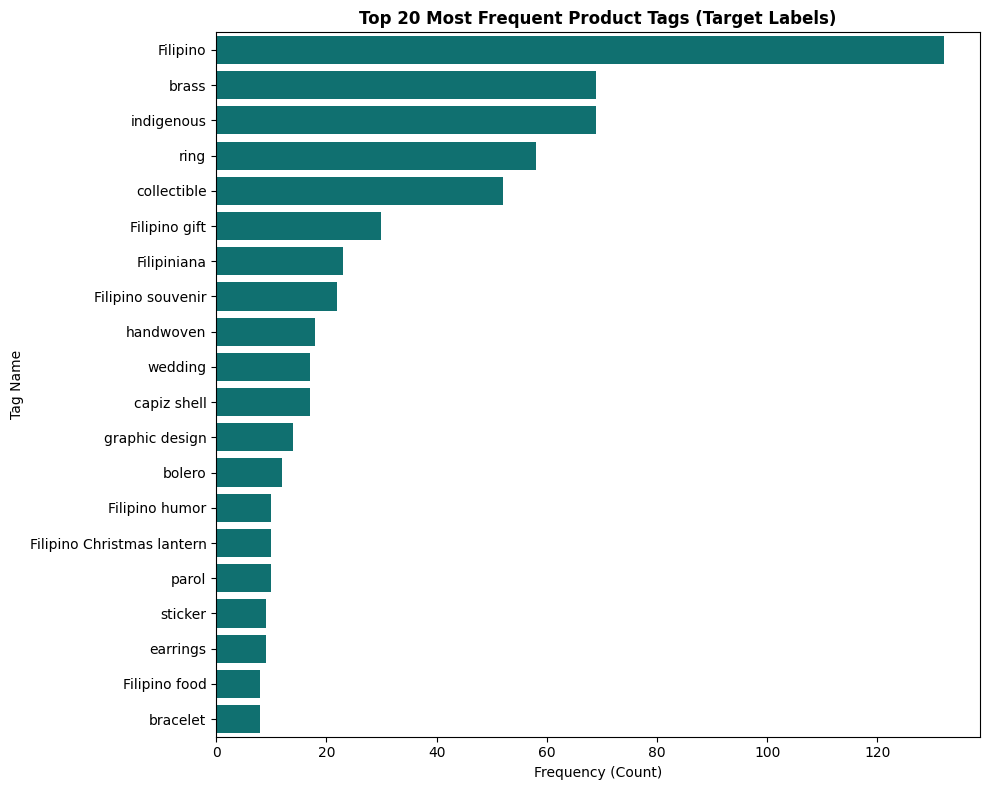

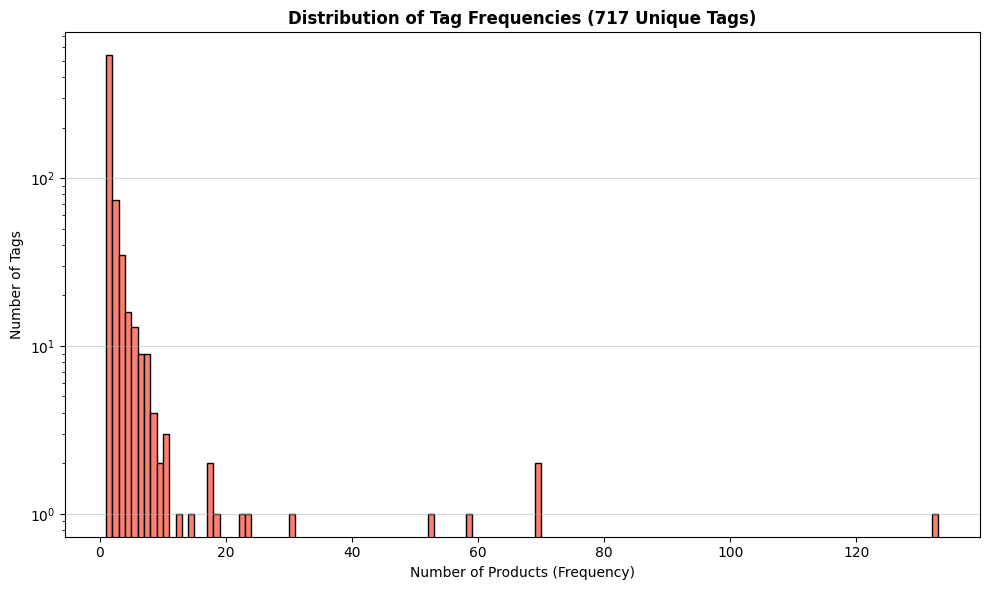

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the frequency of each tag (summing the '1's in the Y matrix)
tag_counts = Y.sum().sort_values(ascending=False)

# Display the top 20 most frequent tags
print("Top 20 Most Frequent Tags:")
print(tag_counts.head(20).to_string())
print("-" * 30)

# Visualize the distribution of the Top 20 Tags
plt.figure(figsize=(10, 8))
sns.barplot(x=tag_counts.head(20).values, y=tag_counts.head(20).index, color='teal')
plt.title('Top 20 Most Frequent Product Tags (Target Labels)', fontweight='bold')
plt.xlabel('Frequency (Count)')
plt.ylabel('Tag Name')
plt.tight_layout()
plt.show()

# Visualize the overall distribution of tag frequencies
plt.figure(figsize=(10, 6))
plt.hist(tag_counts, bins=range(1, tag_counts.max() + 2), edgecolor='black', color='salmon')
plt.title('Distribution of Tag Frequencies (717 Unique Tags)', fontweight='bold')
plt.xlabel('Number of Products (Frequency)')
plt.ylabel('Number of Tags')
plt.yscale('log') # Use log scale to show detail for rare tags
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

## B. Analyze Label Co-occurrence (Correlation Heatmap)
The Multi-Label Classifier assumes that multiple tags can be present simultaneously. Visualizing the co-occurrence helps reveal inherent relationships between the tags (e.g., if a product tagged 'crochet' is also frequently tagged 'cute'). This correlation can be used to interpret the model's structure.

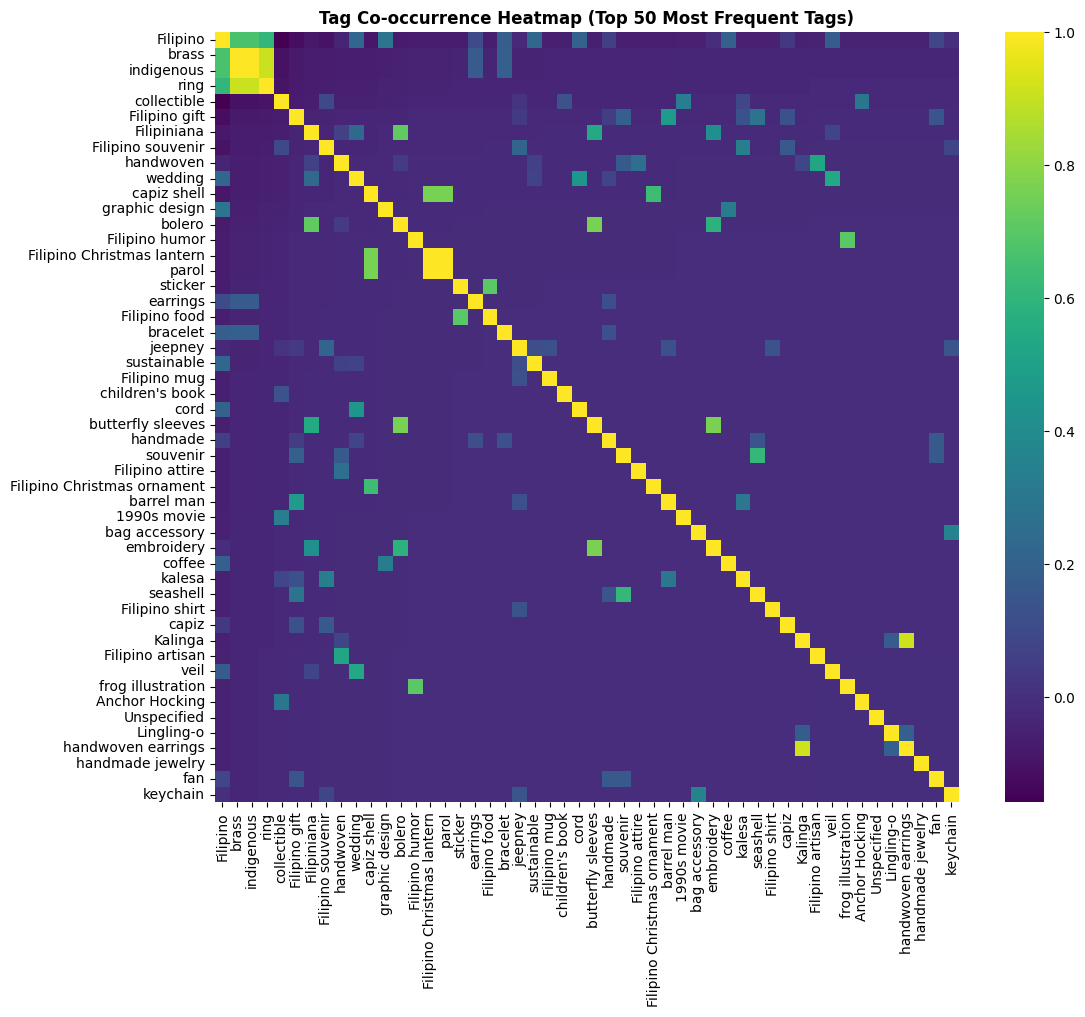

In [38]:
# Calculate the tag correlation matrix
# This matrix shows how often two tags appear together (co-occurrence)
corr_matrix = Y.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
# Plot a subset of the tags (e.g., the top 50 most frequent ones) for clarity
top_tags = tag_counts.head(50).index
sns.heatmap(
    corr_matrix.loc[top_tags, top_tags],
    annot=False, # Set to True if the subset is small (e.g., top 10)
    cmap='viridis',
    fmt=".1f"
)
plt.title('Tag Co-occurrence Heatmap (Top 50 Most Frequent Tags)', fontweight='bold')
plt.show()